In [ ]:
%pip install timm
%pip install torch==1.10.0

In [1]:
CONFIG_PATH = './configs/for_handwritten_names/tiny-ViTSTR-for-handwritten-names.json'
DEVICE = 'cuda'

### Обучение модели

INFO: DEVICE is cuda

Loading pre-trained vision transformer weights from https://dl.fbaipublicfiles.com/deit/deit_tiny_patch16_224-a1311bcf.pth ...

Validation	acc: 0.0000, wer: 1.0016, cer: 10.3117, loop_time: 0m 5s

Epoch 0, Loss: 1.91727, cer: 0.8237, LR: 0.0003721, loop_time: 1m 24s

Validation	acc: 0.0002, wer: 1.0071, cer: 0.4626, loop_time: 0m 5s
Model weights saved

Epoch 1, Loss: 0.83256, cer: 0.4348, LR: 0.0009089, loop_time: 1m 44s

Validation	acc: 0.0000, wer: 1.0033, cer: 0.4915, loop_time: 0m 6s

Epoch 2, Loss: 0.63619, cer: 0.3659, LR: 0.0009988, loop_time: 1m 31s

Validation	acc: 0.0000, wer: 0.9993, cer: 0.3352, loop_time: 0m 8s

Epoch 3, Loss: 0.48871, cer: 0.3009, LR: 0.0009890, loop_time: 1m 40s

Validation	acc: 0.0000, wer: 0.9576, cer: 0.3092, loop_time: 0m 4s

Epoch 4, Loss: 0.39702, cer: 0.2729, LR: 0.0009698, loop_time: 1m 36s

Validation	acc: 0.0139, wer: 0.9812, cer: 0.2473, loop_time: 0m 10s
Model weights saved

Epoch 5, Loss: 0.37319, cer: 0.2595, LR: 0.00

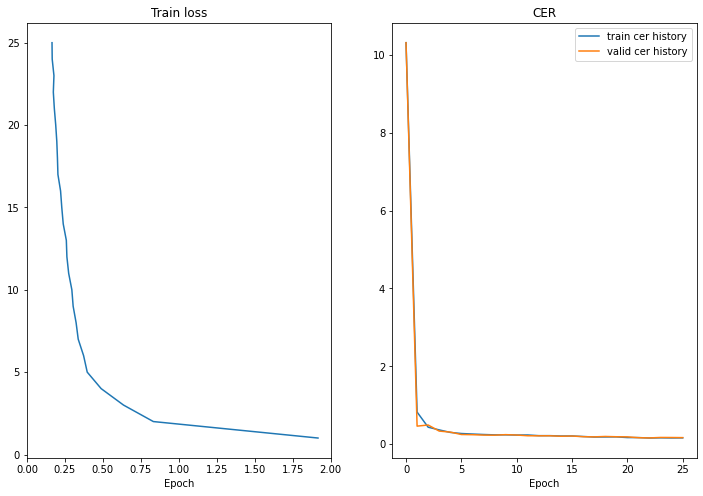

<Figure size 432x288 with 0 Axes>

In [16]:
#!g1.1
%run train.py --config_path "{CONFIG_PATH}"

### Тестирование модели

In [17]:
import cv2
import random

from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

from utils.predictor import OcrPredictor
from utils.config import Config

In [18]:
config = Config(CONFIG_PATH)
models_directory = config.get("save_dir")
images_directory = '../data/handwritten_names/test_v2/test'

models_directory # = '../data/experiments/test'

'../data/experiments/handwritten_names'

In [19]:
images = [f for f in listdir(images_directory) if isfile(join(images_directory, f))]
models = [f for f in listdir(models_directory) if isfile(join(models_directory, f))]

In [21]:
models = list(filter(lambda model_name: model_name[6:model_name.find('-', 6)].isdigit(), models))
models = sorted(models, key=lambda model_name: int(model_name[6:model_name.find('-', 6)]), reverse=True)
model_path = join(models_directory, models[0])
model_path # = "../data/experiments/handwritten_names/tiny-ViTSTR.ckpt"

'../data/experiments/handwritten_names/model-21-0.2359.ckpt'

In [22]:
image_path = join(images_directory, random.choice(images))
image_path

In [23]:
#!g1.1
predictor = OcrPredictor(
    model_path=model_path,
    config_path=CONFIG_PATH,
    device=DEVICE
)

Downloading: "https://dl.fbaipublicfiles.com/deit/deit_tiny_patch16_224-a1311bcf.pth" to /tmp/xdg_cache/torch/hub/checkpoints/deit_tiny_patch16_224-a1311bcf.pth



Loading pre-trained vision transformer weights from https://dl.fbaipublicfiles.com/deit/deit_tiny_patch16_224-a1311bcf.pth ...


In [24]:
img = cv2.imread(image_path)

In [25]:
#!g1.1
pred_data = predictor(img)

Prediction: IEL HADIDI


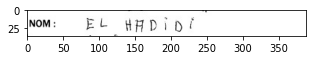

In [26]:
print("Prediction: " + pred_data)

plt.figure(figsize=(5, 5))
plt.imshow(img)